<a href="https://colab.research.google.com/github/TinKlo/Advertising_Web/blob/master/kmeans_with_pycaret_sample_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas-profiling==3.1.0


     |████████████████████████████████| 38.1 MB 1.8 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.2.0
    Uninstalling scipy-1.2.0:
      Successfully uninstalled scipy-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scipy<=1.5.4, but you have scipy 1.7.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [5]:
!pip install pycaret

  Using cached scipy-1.5.4-cp37-cp37m-manylinux1_x86_64.whl (25.9 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
# Generating a Synthetic Dataset
cols = ['column1', 'column2', 'column3',
        'column4', 'column5']

arr = make_blobs(n_samples = 1000, n_features = 5, random_state = 20,
                 centers = 3, cluster_std = 1)

data = pd.DataFrame(data = arr[0], columns = cols)

data.head()

,column1,column2,column3,column4,column5
0,2.916076,6.504857,8.246937,6.185952,-9.776481
1,-2.044462,5.282757,5.265467,7.487941,6.347177
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881
3,2.155568,8.776136,5.788650,5.751763,-7.609132
4,-6.650020,5.458227,5.848407,7.150584,5.992247


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   column1  1000 non-null   float64
 1   column2  1000 non-null   float64
 2   column3  1000 non-null   float64
 3   column4  1000 non-null   float64
 4   column5  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


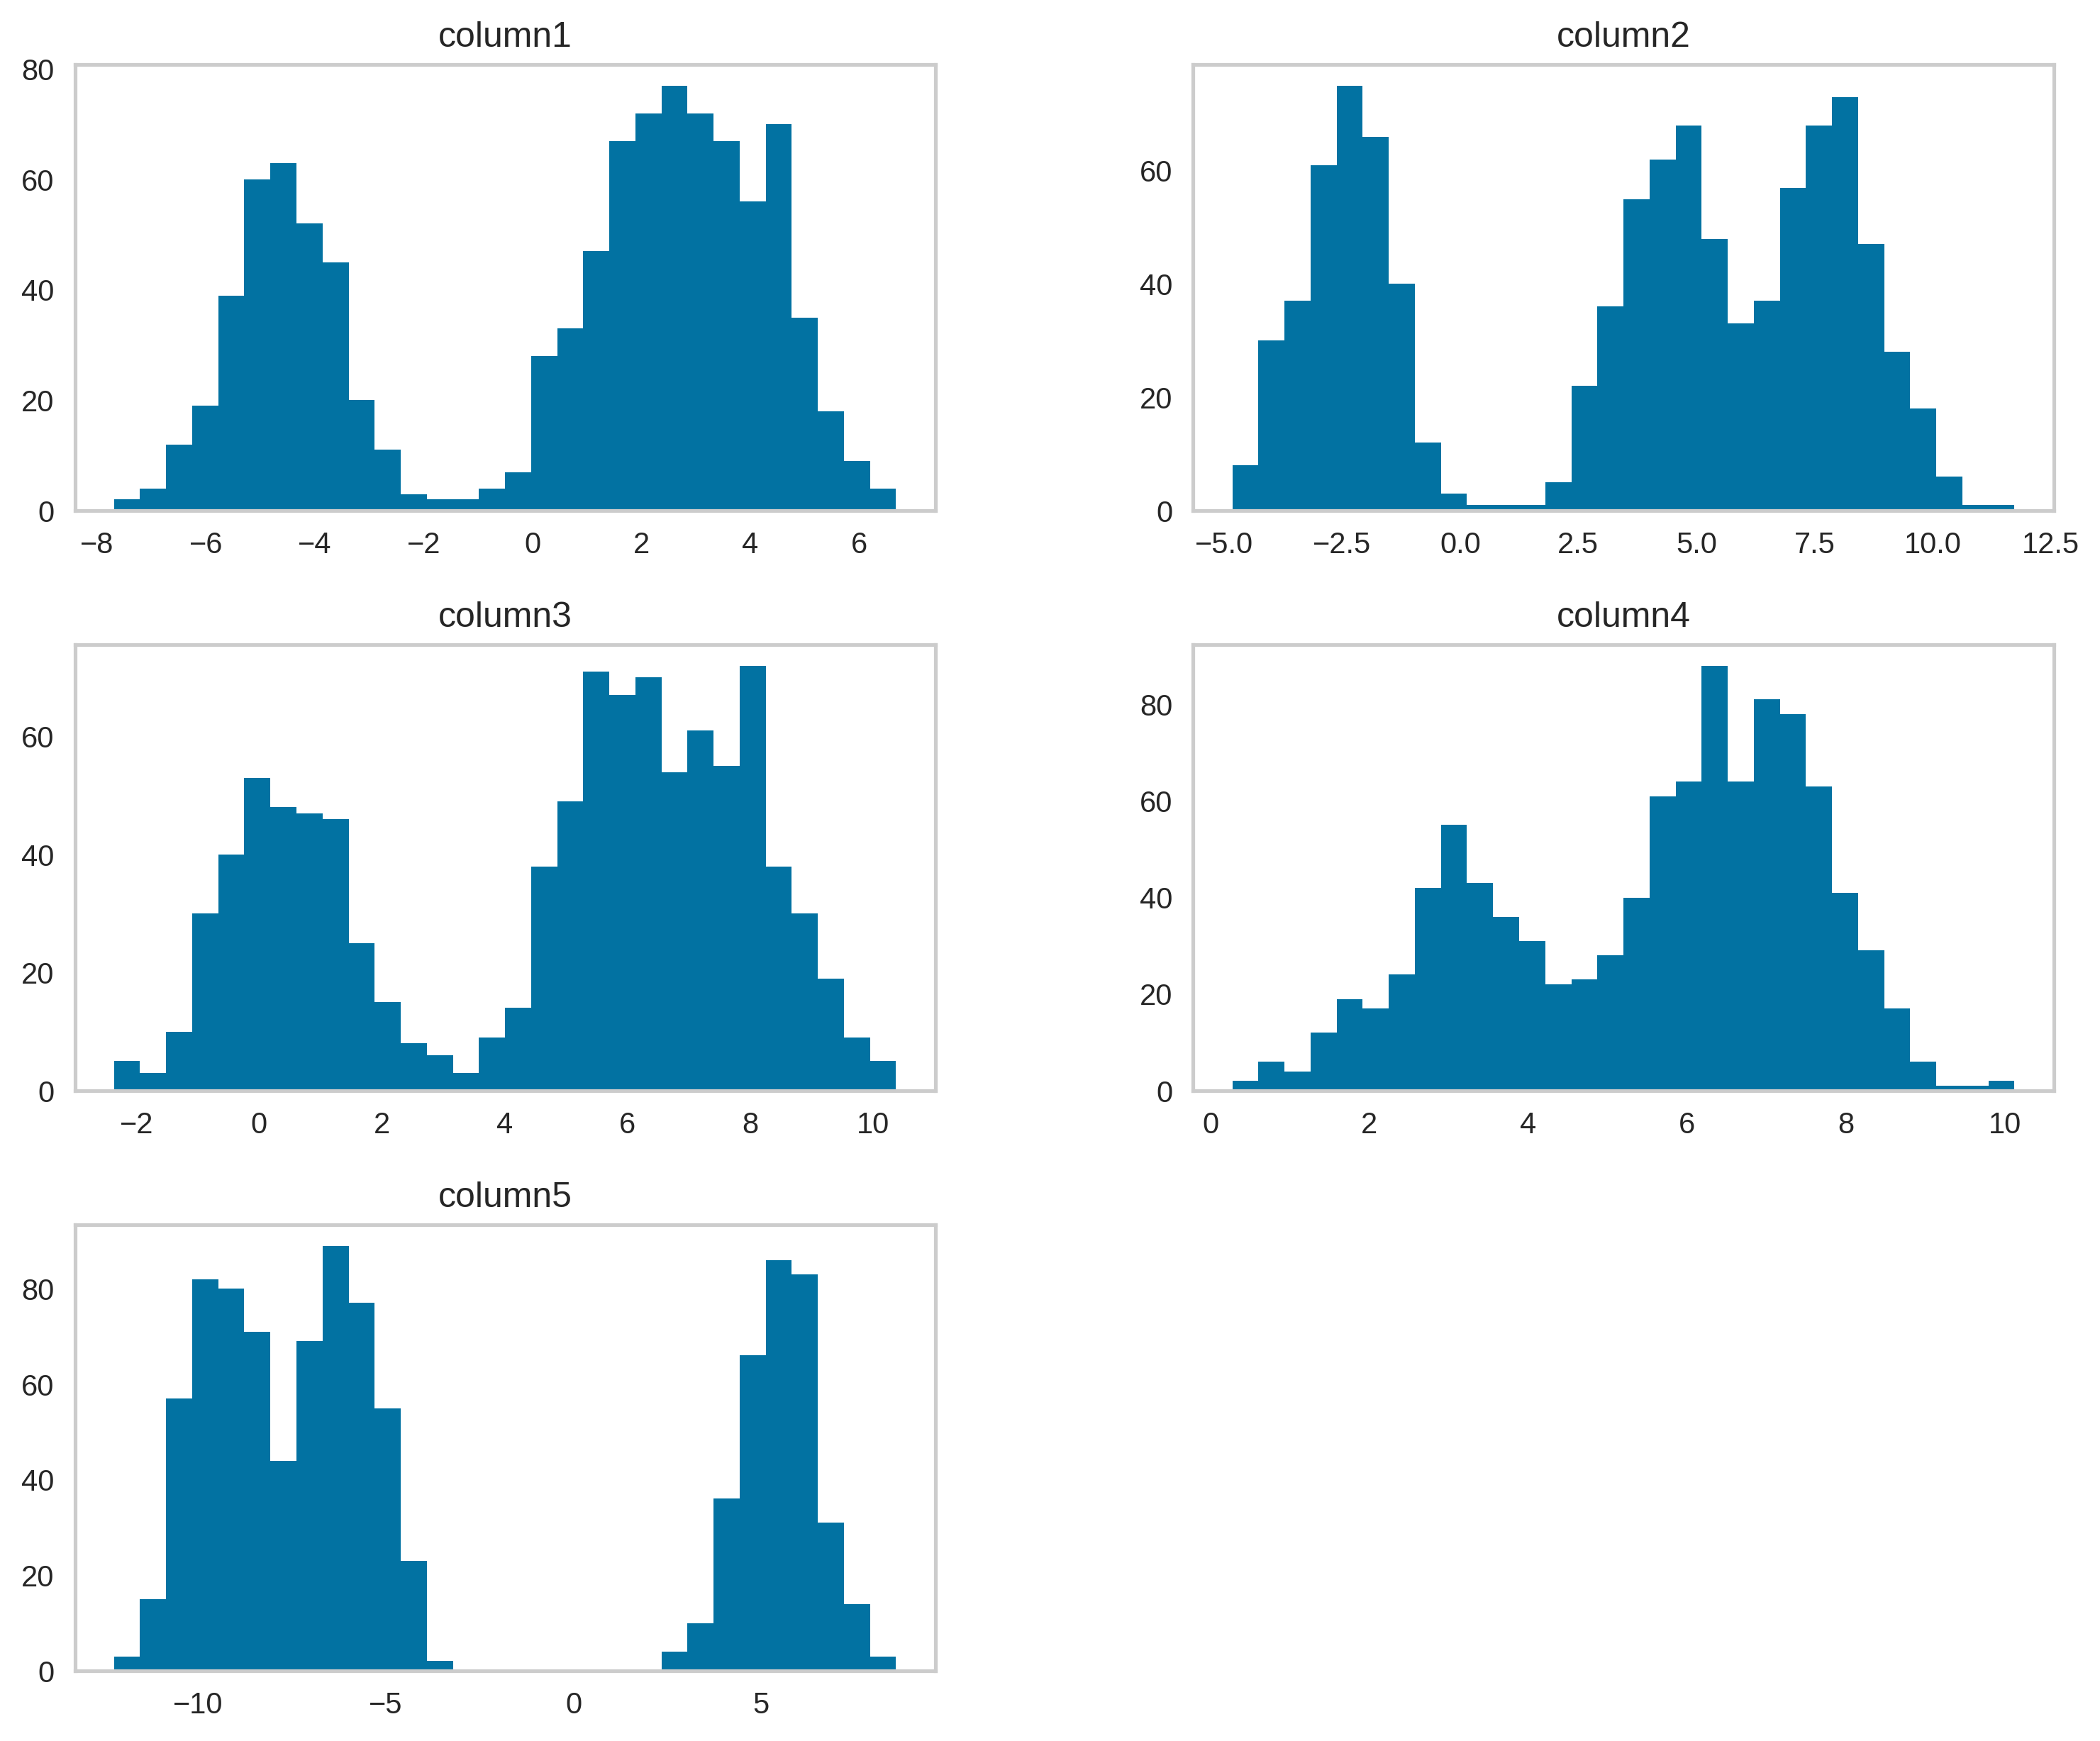

In [9]:
data.hist(bins = 30, figsize = (12,10), grid = False)

plt.show()

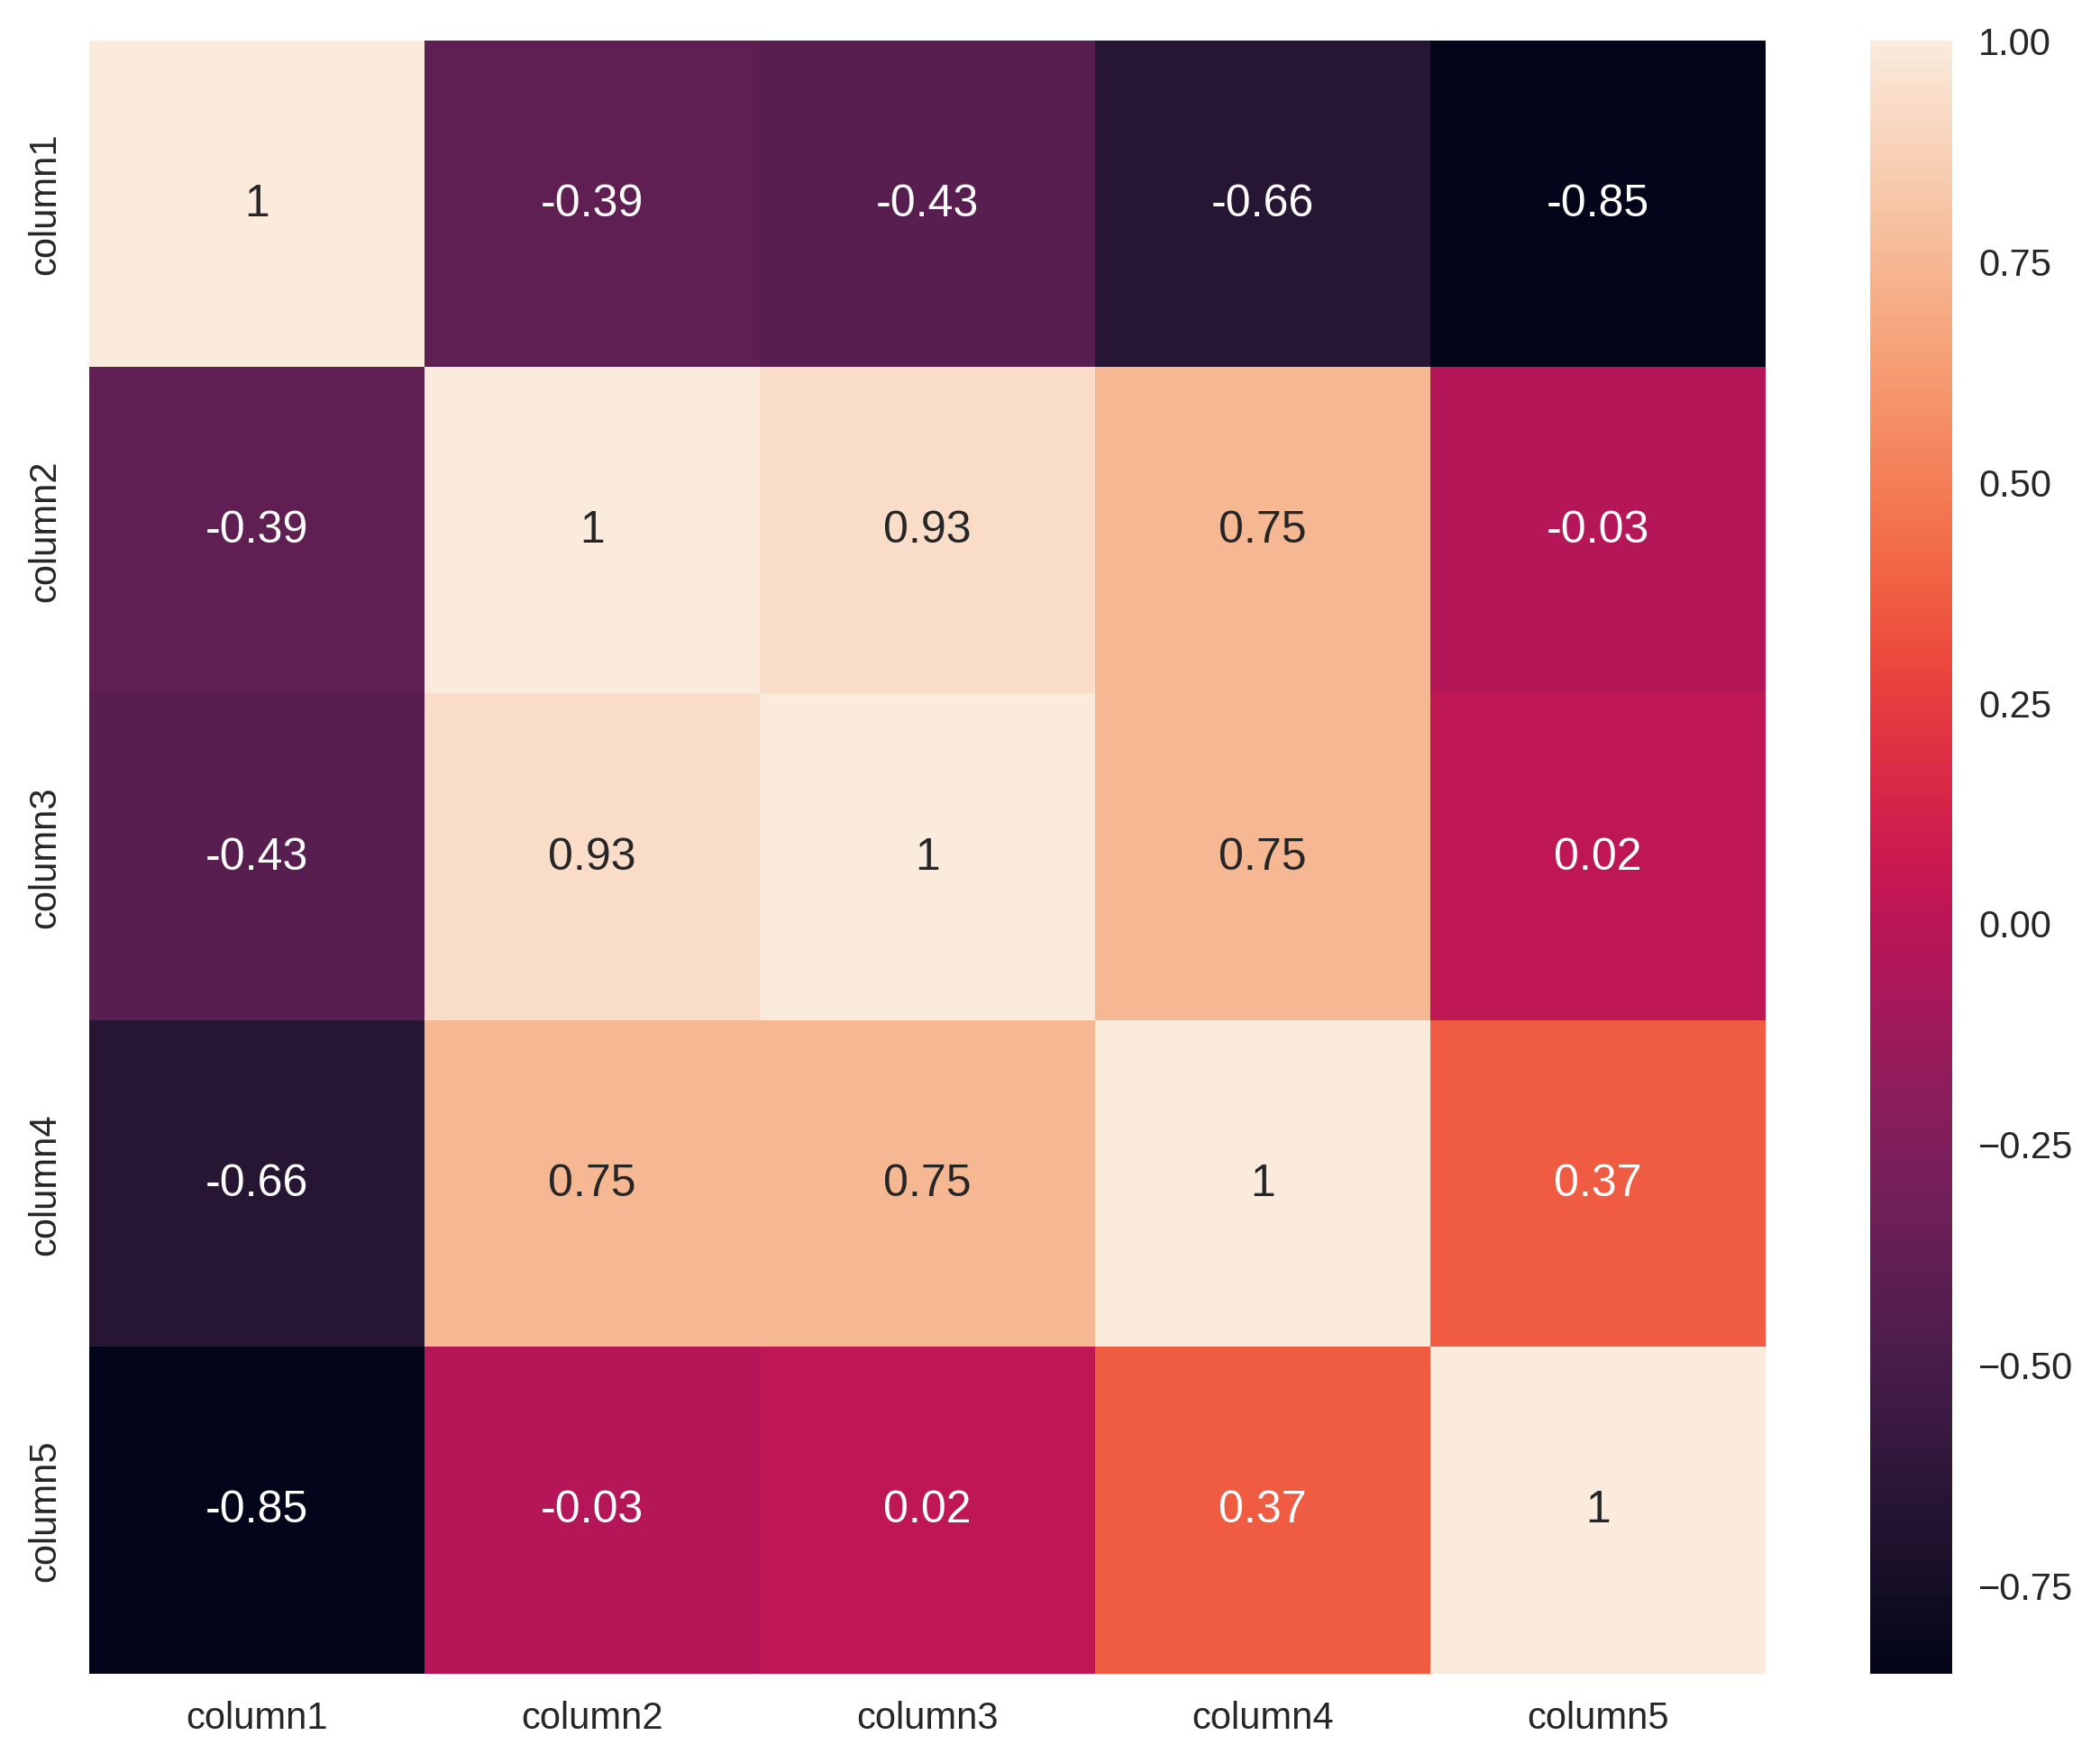

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)

plt.show()

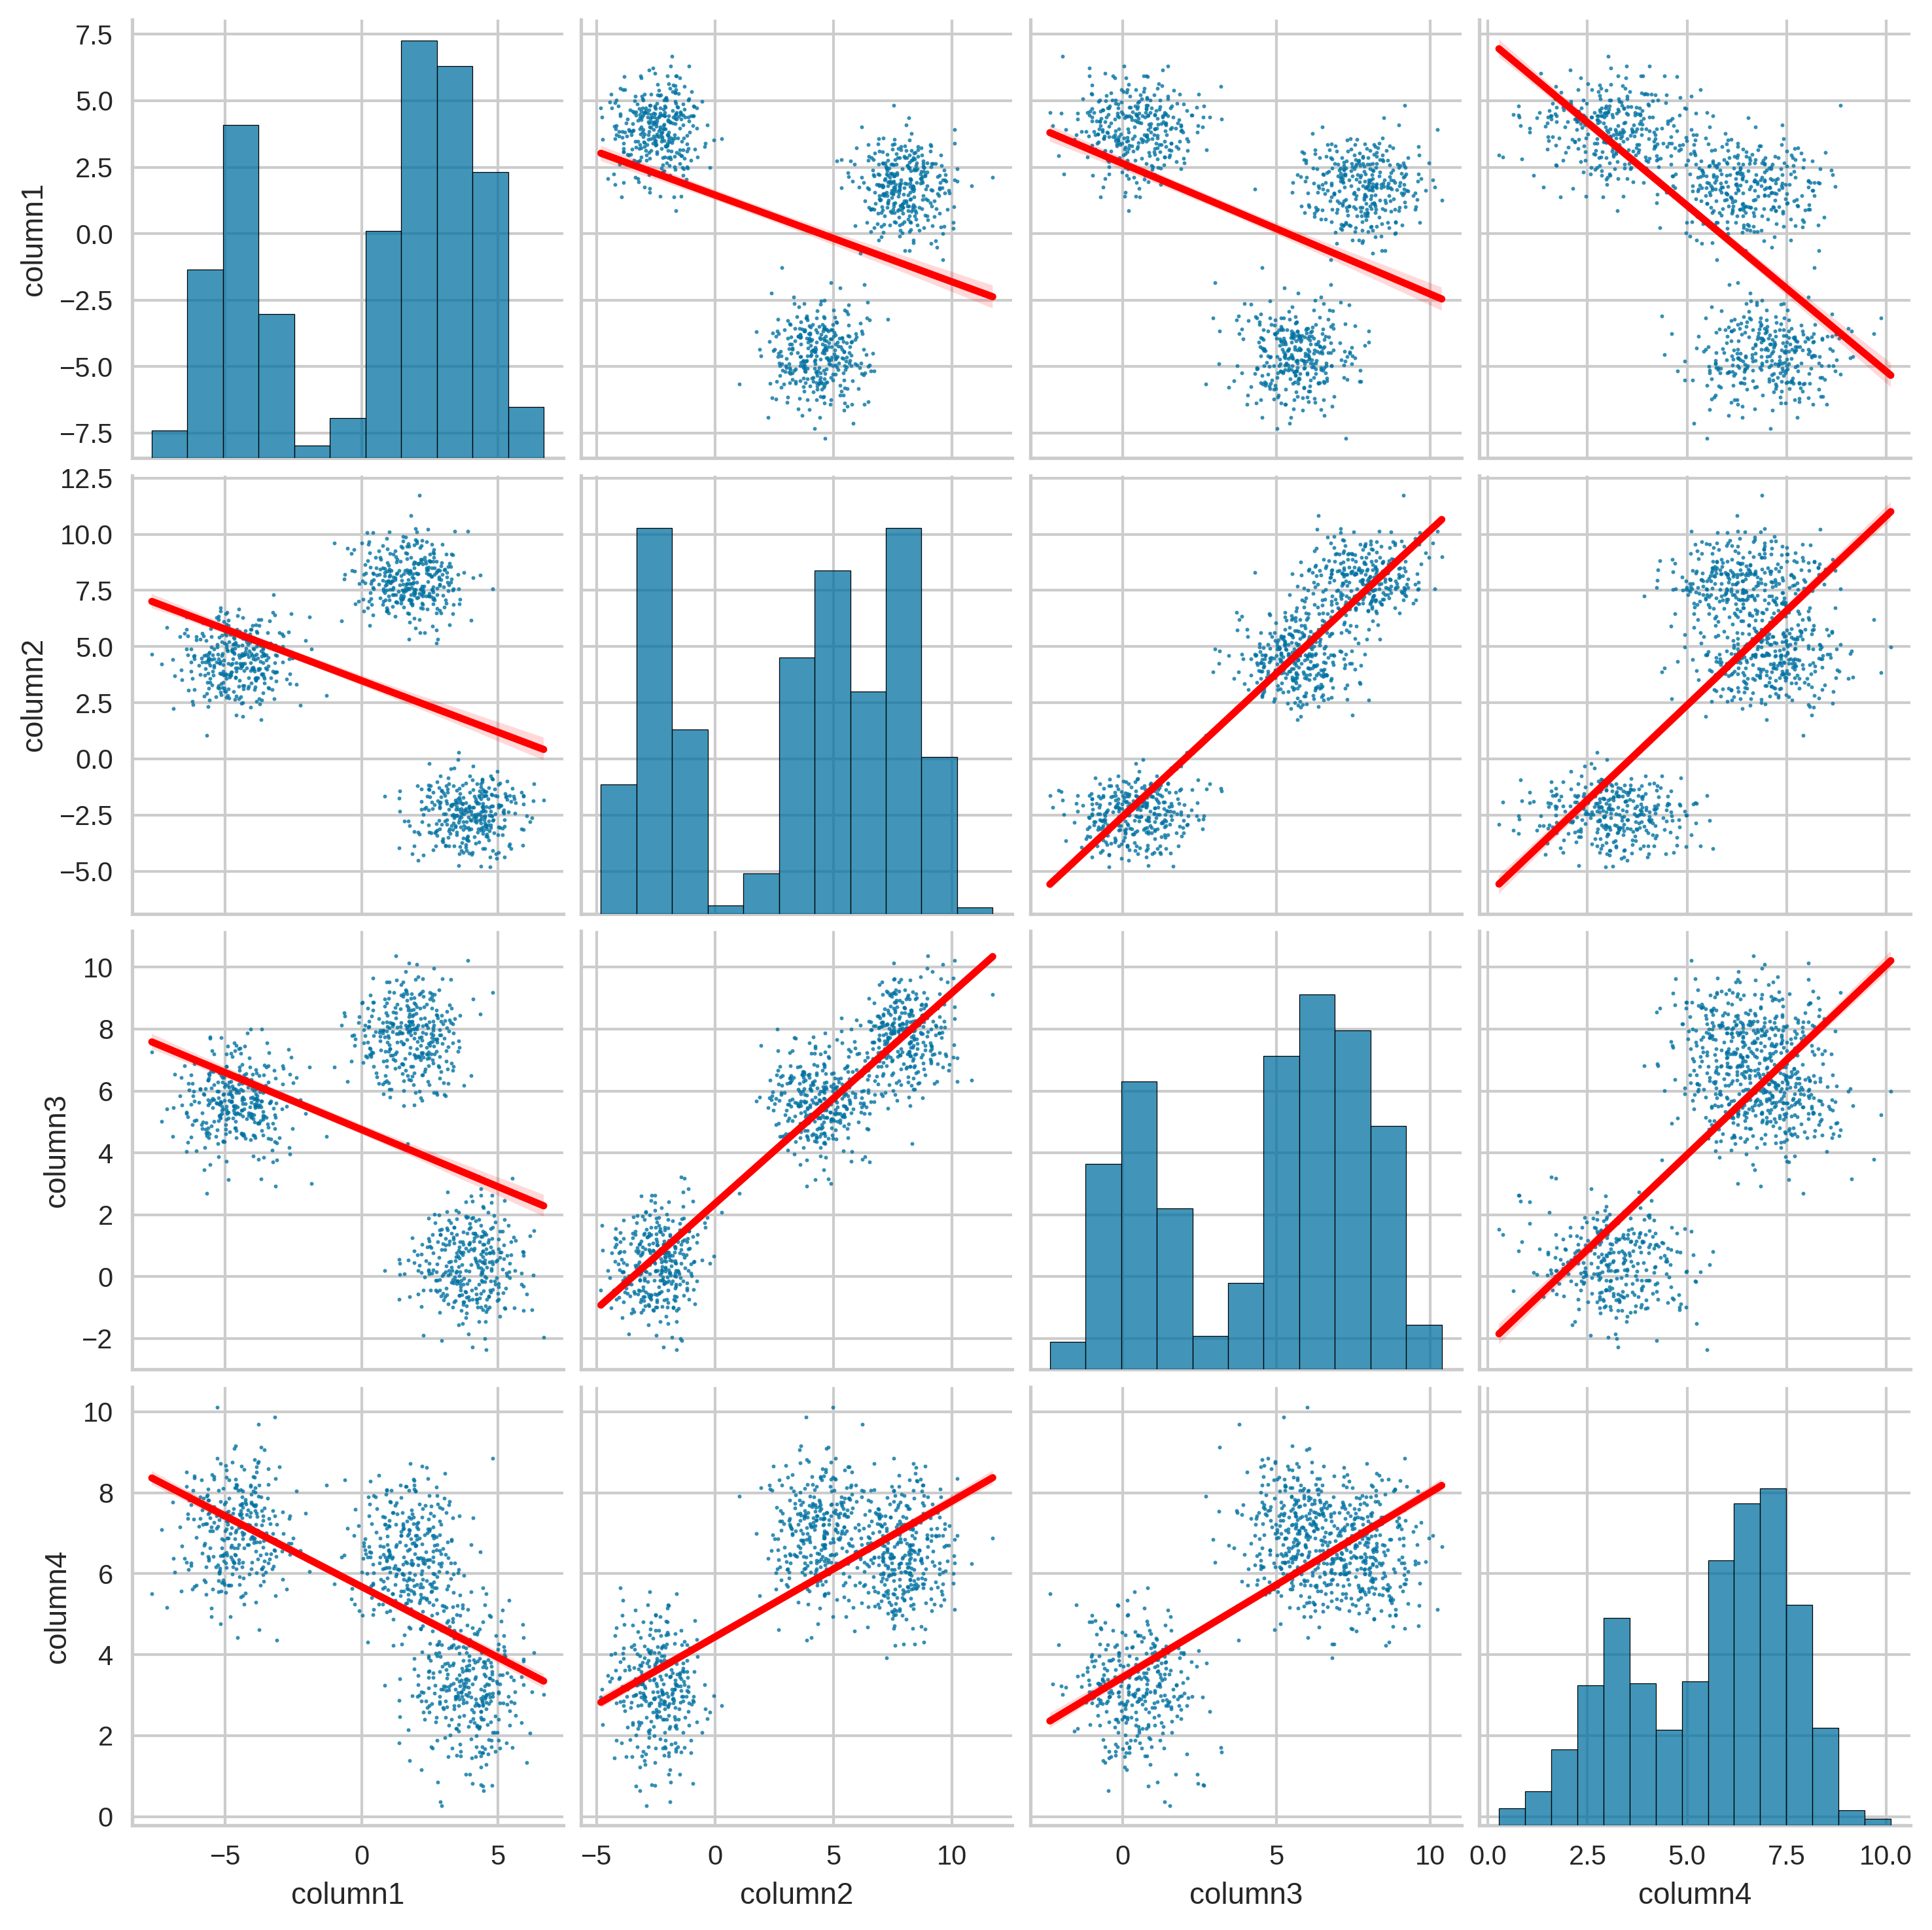

In [11]:
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}

sns.pairplot(data, kind='reg', vars=data.columns[:-1], plot_kws=plot_kws)
plt.show()

In [13]:
cluster = setup(data, session_id = 7652)


,Description,Value
0,session_id,7652
1,Original Data,"(1000, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 5)"
9,CPU Jobs,-1


In [14]:
cluster = setup(data, session_id = 7652)


,Description,Value
0,session_id,7652
1,Original Data,"(1000, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 5)"
9,CPU Jobs,-1


In [15]:
model = create_model('kmeans')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5822,6041.4265,1.2247,0,0,0


In [1]:
!pip install scipy==1.2 --upgrade


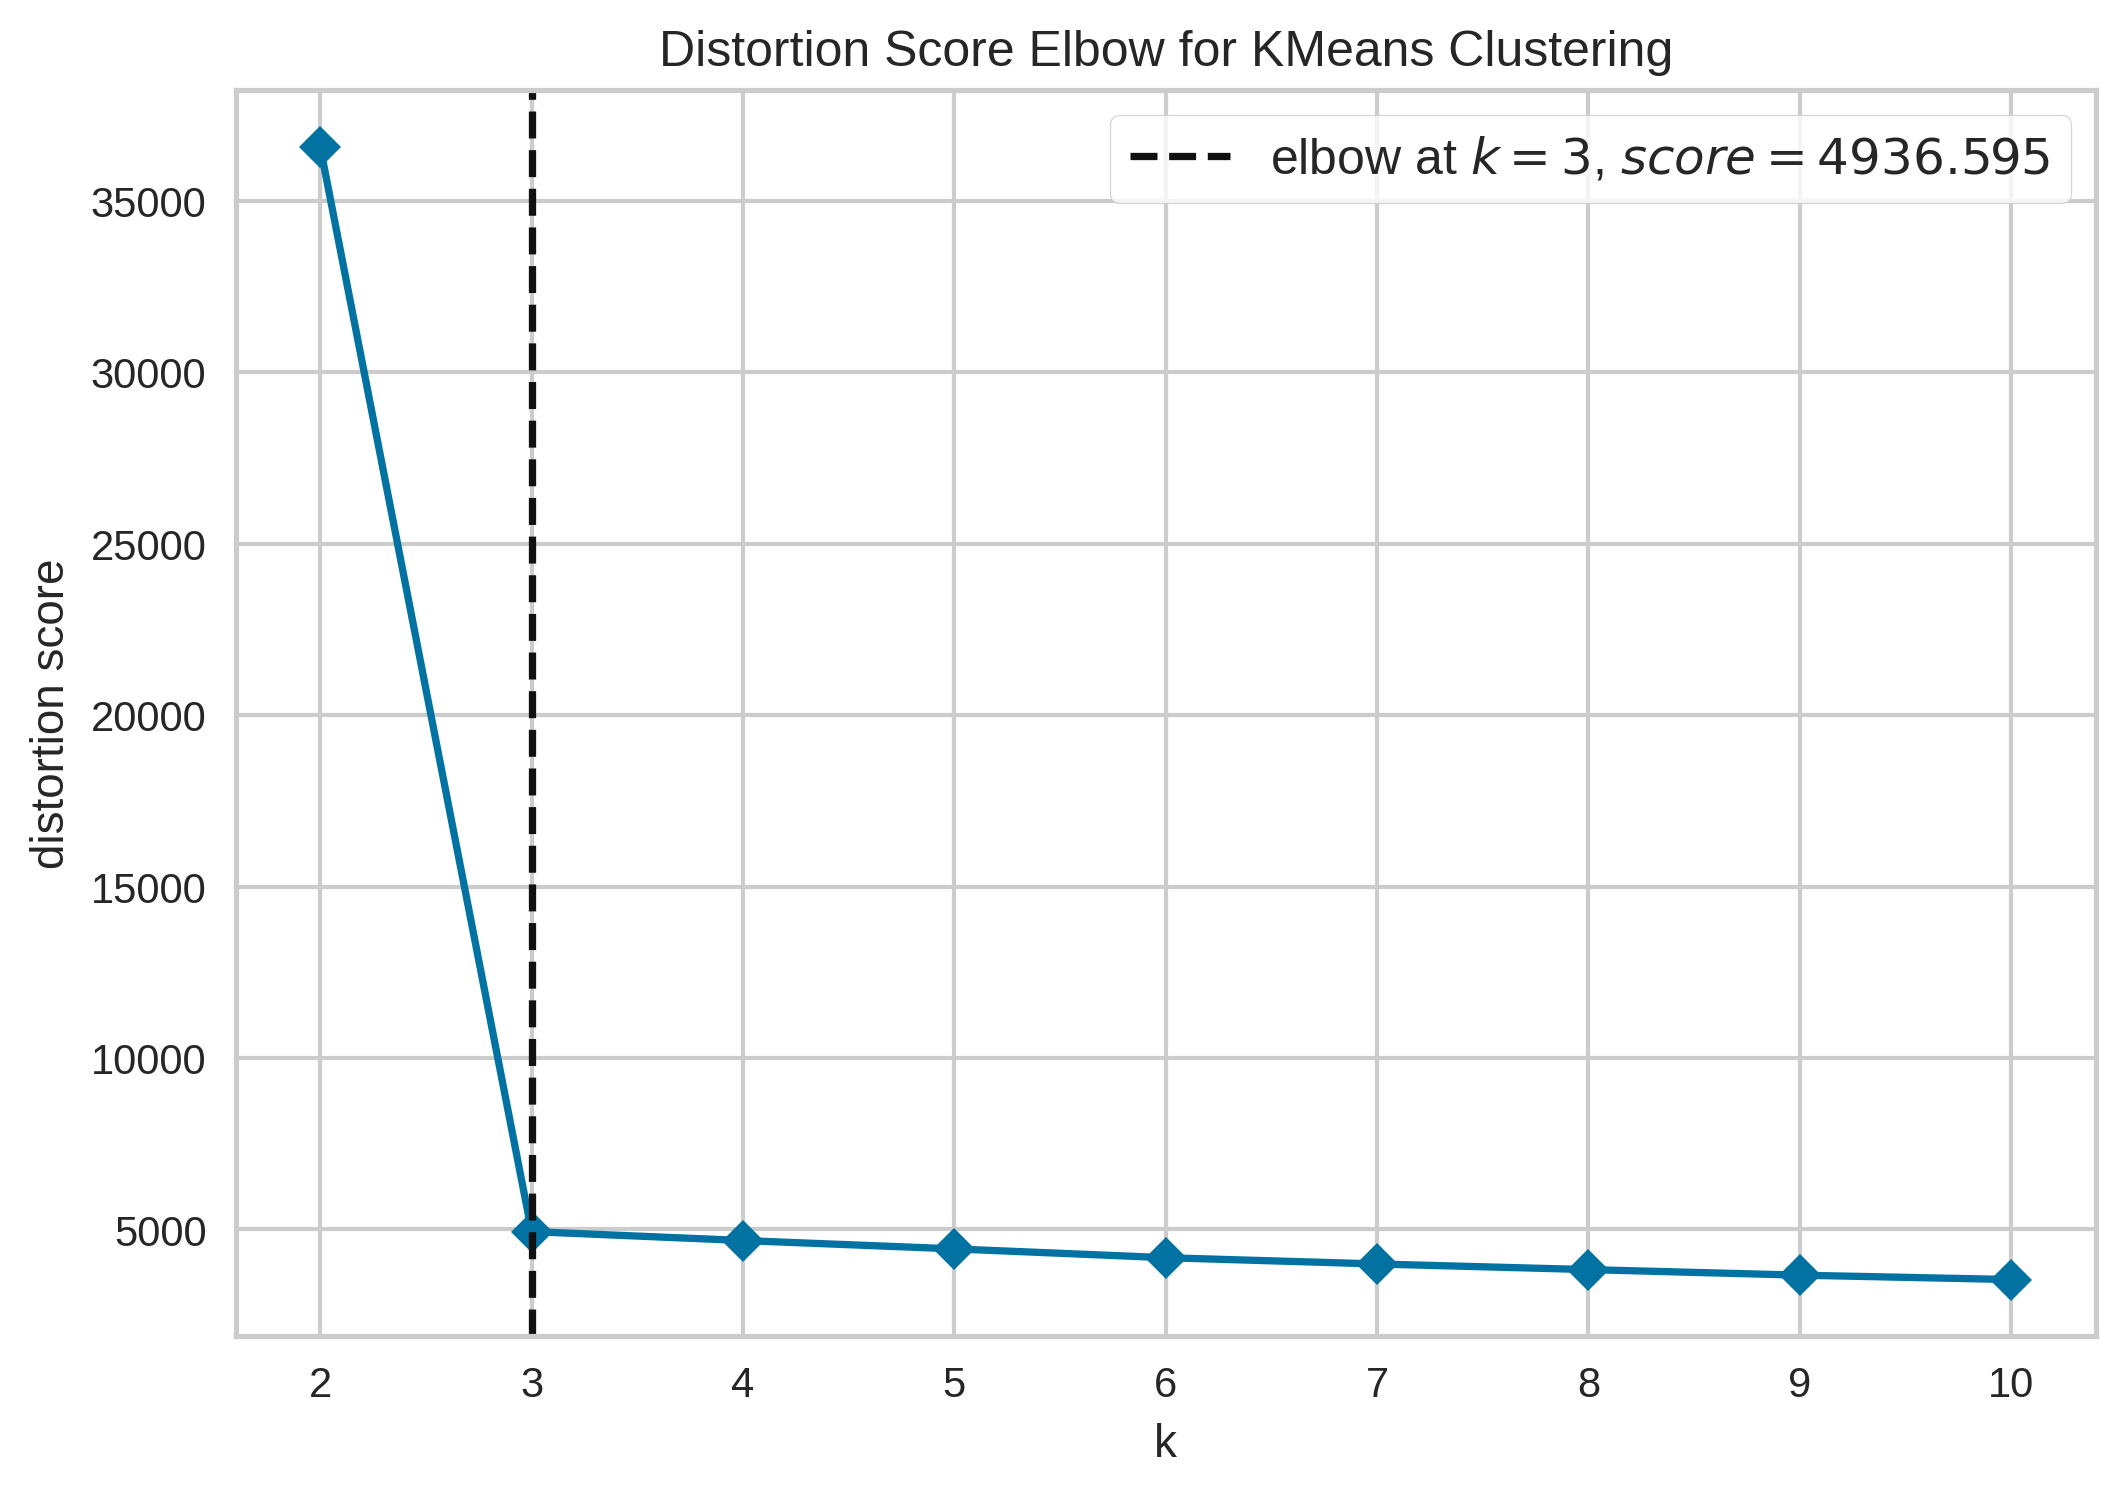

In [16]:
plot_model(model, 'elbow')

In [17]:
model = create_model('kmeans', num_clusters = 3)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7972,8565.5114,0.2904,0,0,0


In [18]:
plot_model(model, 'cluster')


In [19]:
save_model(model, 'clustering_model', verbose = False)

results = assign_model(model)
results.head(10)

,column1,column2,column3,column4,column5,Cluster
0,2.916076,6.504857,8.246937,6.185952,-9.776481,Cluster 2
1,-2.044462,5.282757,5.265467,7.487941,6.347177,Cluster 0
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881,Cluster 1
3,2.155568,8.776136,5.788650,5.751763,-7.609132,Cluster 2
4,-6.650020,5.458227,5.848407,7.150584,5.992247,Cluster 0
5,2.845247,8.015184,9.271296,6.060792,-8.281544,Cluster 2
6,-6.252012,3.910582,4.499606,6.197325,5.454781,Cluster 0
7,-4.962223,2.730723,6.787934,7.299566,5.073320,Cluster 0
8,1.727624,6.452070,6.378151,4.688654,-9.605882,Cluster 2
9,-5.568622,4.162203,7.741415,7.373318,5.787458,Cluster 0
